# IMPORTING FILES


In [1]:
     ######clarify variables and files########
%reset -f
!rm *

'rm' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
#            ######importing csv files: please import Bias_correction_ucl.csv and sobar-72.csv in google colab#####
# from google.colab import files
# uploaded = files.upload()

# REGRESSION (Random forest regression)

In [3]:
#importing main librarries
import pandas as pd
from pandas.io.formats.info import DataFrameTableBuilderVerbose
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import io
import tensorflow
from tensorflow import keras



df_1 = pd.read_csv('Bias_correction_ucl.csv')
print(df_1)

      station        Date  Present_Tmax  Present_Tmin  LDAPS_RHmin  \
0         1.0  2013-06-30          28.7          21.4    58.255688   
1         2.0  2013-06-30          31.9          21.6    52.263397   
2         3.0  2013-06-30          31.6          23.3    48.690479   
3         4.0  2013-06-30          32.0          23.4    58.239788   
4         5.0  2013-06-30          31.4          21.9    56.174095   
...       ...         ...           ...           ...          ...   
7747     23.0  2017-08-30          23.3          17.1    26.741310   
7748     24.0  2017-08-30          23.3          17.7    24.040634   
7749     25.0  2017-08-30          23.2          17.4    22.933014   
7750      NaN         NaN          20.0          11.3    19.794666   
7751      NaN         NaN          37.6          29.9    98.524734   

      LDAPS_RHmax  LDAPS_Tmax_lapse  LDAPS_Tmin_lapse   LDAPS_WS    LDAPS_LH  \
0       91.116364         28.074101         23.006936   6.818887   69.451805   

In [4]:
#seeking for NaNs
print(df_1.isnull().sum()) 
df_1.shape

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64


(7752, 25)

In [ ]:
# #changing categorical date to continuous
# d = df_1['Date']
# n = list(d.shape)
# m = n[0]
# day = []
# for i in range(m):
#   day.append(int(1+(i/25)))

# days = dict(enumerate(day))
# df_1['Date'] = (day)
# print(days)

In [6]:
#changing categorical date to continuous
# df_1['Date'] = pd.to_datetime(df_1['Date'], format='%d%b%Y:%H:%M:%S.%f')


ValueError: time data "2013-06-30" doesn't match format "%d%b%Y:%H:%M:%S.%f", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
  #cleaning NaNs
df_1 = df_1.replace('',np.nan)
df_1 = df_1.dropna(axis="rows", how="any")
df_1 = df_1.replace('',np.nan)
print(df_1.isnull().sum()) 
df_1.shape

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64


(7588, 25)

In [7]:
# #####using io for design#####
# dfStyler = df.style.set_properties(**{'text-align': 'left'})
# dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

In [8]:
                   ######seprating features and targets#######
#from sklearn.preprocessing import StandardScaler
features = ['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse','LDAPS_WS', 'LDAPS_LH'
            , 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','lat', 'lon', 'DEM', 'Slope', 'Solar radiation']
#scale = StandardScaler()
# features = ['anchor_ratio', 'trans_range', 'node_density', 'iterations']
X = df_1[features]
#X = scale.fit_transform(X) 
targets = ['Next_Tmax', 'Next_Tmin' ]
Y = df_1[targets]
y_1 = df_1['Next_Tmax']  
y_2 = df_1['Next_Tmin']
#Y = scale.fit_transform(Y)   
#y_1 = scale.fit_transform(y_1)
#y_2 = scale.fit_transform(y_2)  
print(X)
print(Y)


      station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0         1.0          28.7          21.4    58.255688    91.116364   
1         2.0          31.9          21.6    52.263397    90.604721   
2         3.0          31.6          23.3    48.690479    83.973587   
3         4.0          32.0          23.4    58.239788    96.483688   
4         5.0          31.4          21.9    56.174095    90.155128   
...       ...           ...           ...          ...          ...   
7745     21.0          23.1          17.8    24.688997    78.261383   
7746     22.0          22.5          17.4    30.094858    83.690018   
7747     23.0          23.3          17.1    26.741310    78.869858   
7748     24.0          23.3          17.7    24.040634    77.294975   
7749     25.0          23.2          17.4    22.933014    77.243744   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS    LDAPS_LH  LDAPS_CC1  \
0            28.074101         23.006936  6.818887   69.451805   0.233

## testing regression models(not trusted)

In [38]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# data= df_1[['condensor_pressure(atm)', 'produced_acetic_acid_mass_fraction', 'reboiler(pot)_temperature(C)','condensor_temperature(C)', 'upper_product_flow_rate(kg/hr)', 'condensor_mass_flow_outlet_rate',
#             'aceticindutyoverflow',
#           'pot_pressure(atm)', 'fraction_over_pressure', 'duty_over_frac_multiplyed_by_pressure', 'reboiler_temp_on_flowrate', 'condensor_temp_on_flowrate', 'reboiler(pot)_heat_duty(Watt)', 'reflux_ratio','daily_work(min)']]

# scale = StandardScaler()
scale = StandardScaler()
normalized_data = scale.fit_transform(X)# axis=0)
# normalized_data = preprocessing.minmax_scale(data ,axis=0)
scaled_data = pd.DataFrame(normalized_data, columns=X.columns)
print(scaled_data)

X = scaled_data[['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin','LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse','LDAPS_WS', 'LDAPS_LH'
            , 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4','lat', 'lon', 'DEM', 'Slope', 'Solar radiation']]# 'condenser_mass_flow_outlet_rate']]
# Y = scaled_data[['reflux_ratio', 'daily_work(min)']]
# print(Y)


       station  Present_Tmax  Present_Tmin  LDAPS_RHmin  LDAPS_RHmax  \
0    -1.664607     -0.353318     -0.748029     0.104660     0.382768   
1    -1.526052      0.725138     -0.664721    -0.305052     0.311697   
2    -1.387498      0.624033      0.043400    -0.549344    -0.609425   
3    -1.248943      0.758840      0.085054     0.103573     1.128335   
4    -1.110389      0.556630     -0.539758    -0.037665     0.249244   
...        ...           ...           ...          ...          ...   
7583  1.106481     -2.240616     -2.247578    -2.190405    -1.402898   
7584  1.245036     -2.442826     -2.414195    -1.820788    -0.648815   
7585  1.383590     -2.173212     -2.539157    -2.050081    -1.318376   
7586  1.522145     -2.173212     -2.289232    -2.234735    -1.537141   
7587  1.660699     -2.206914     -2.414195    -2.310467    -1.544257   

      LDAPS_Tmax_lapse  LDAPS_Tmin_lapse  LDAPS_WS  LDAPS_LH  LDAPS_CC1  ...  \
0            -0.525269         -0.215525 -0.126423  0.2

c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not ha

In [39]:
from keras.layers import LSTM,Dense
from keras import optimizers
from keras.models import Sequential
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

input_shape = X.shape[1]
output_shape = Y.shape[1]

model = Sequential()
# model.add(LSTM(12, recurrent_dropout=0.2, input_shape=(input_shape,1), activation='relu'))
model.add(Dense(35, input_dim= input_shape, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(35, activation='relu'))
model.add(Dense(output_shape))
model.compile(loss='mae', optimizer='adam')
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 35)                805       
                                                                 
 dense_13 (Dense)            (None, 35)                1260      
                                                                 
 dense_14 (Dense)            (None, 35)                1260      


                                                                 
 dense_15 (Dense)            (None, 2)                 72        
                                                                 
Total params: 3,397
Trainable params: 3,397
Non-trainable params: 0
_________________________________________________________________


In [53]:
history = model.fit(X_train, Y_train, batch_size=512, epochs=500, validation_split=0.2, verbose=1)

Epoch 1/500
10/10 [==============================] - 0s 7ms/step - loss: 0.5538 - val_loss: 0.7299
Epoch 2/500
10/10 [==============================] - 0s 3ms/step - loss: 0.5539 - val_loss: 0.7282
Epoch 3/500
10/10 [==============================] - 0s 3ms/step - loss: 0.5487 - val_loss: 0.7254
Epoch 4/500
10/10 [==============================] - 0s 3ms/step - loss: 0.5505 - val_loss: 0.7283
Epoch 5/500
10/10 [==============================] - 0s 3ms/step - loss: 0.5507 - val_loss: 0.7244
Epoch 6/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5505 - val_loss: 0.7277
Epoch 7/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5527 - val_loss: 0.7265
Epoch 8/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5510 - val_loss: 0.7277
Epoch 9/500
10/10 [==============================] - 0s 3ms/step - loss: 0.5479 - val_loss: 0.7243
Epoch 10/500
10/10 [==============================] - 0s 4ms/step - loss: 0.5479 - val_loss: 0.7265
Epoch 11/

In [54]:
for layer in model.layers:
    if isinstance(layer, Dense):
        weights = layer.get_weights()
        mean_weight = np.mean(weights[0])
        std_weight = np.std(weights[0])
        mean_gradient = np.mean(weights[1])
        std_gradient = np.std(weights[1])
        print("second model lstm for distillate flow rate", f"Layer {layer.name}: Mean Weight = {mean_weight}, Std Weight = {std_weight}, Mean Gradient = {mean_gradient}, Std Gradient = {std_gradient}")

second model lstm for distillate flow rate Layer dense_12: Mean Weight = -0.018361784517765045, Std Weight = 0.2533588707447052, Mean Gradient = 0.4329479932785034, Std Gradient = 0.23993417620658875
second model lstm for distillate flow rate Layer dense_13: Mean Weight = 0.010552766732871532, Std Weight = 0.22001884877681732, Mean Gradient = 0.48058846592903137, Std Gradient = 0.3003487288951874
second model lstm for distillate flow rate Layer dense_14: Mean Weight = 0.05458469316363335, Std Weight = 0.27736711502075195, Mean Gradient = 0.2766920328140259, Std Gradient = 0.3083632290363312
second model lstm for distillate flow rate Layer dense_15: Mean Weight = 0.050509851425886154, Std Weight = 0.38801679015159607, Mean Gradient = 0.4155765473842621, Std Gradient = 0.03934144973754883


In [55]:
from sklearn.metrics import r2_score

print(r2_score(Y_test, model.predict(X_test)))

48/48 [==============================] - 0s 681us/step
0.887368120701794


c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [43]:
from sklearn.tree import DecisionTreeRegressor
model_1 = DecisionTreeRegressor()
model_1.fit(X,Y)
model_1.score(X,Y)
# model_1.fit(X,y_1)
# model_1.fit(X,y_2)
# model_1.score(X,y_1)
# model_1.score(X,y_2)

c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not ha

1.0

In [10]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(X,Y)
model_2.score(X,Y)

0.9875967161740857

In [11]:
from sklearn.linear_model import LinearRegression
model_3 = LinearRegression()
model_3.fit(X,Y)
model_3.score(X,Y)

0.8094813465005736

In [12]:
              ##### predict by Decision tree regressor ######
sample = X.tail(1)
predicted_1 = model_1.predict(sample)
print("prediction of decision tree model in last row = " , predicted_1[0])
print("The main amount of outputs in last row = " , Y.tail(1).values[0])

prediction of decision tree model in last row =  [27.8 17.4]
The main amount of outputs in last row =  [27.8 17.4]


In [13]:
            ##### predict by Random forest regressor ######
predicted_2 = model_2.predict(sample)
print("prediction of random forest model in last row = " , predicted_2[0])
print("The main amount of outputs in last row = " , Y.tail(1).values[0])

prediction of random forest model in last row =  [27.833 17.396]
The main amount of outputs in last row =  [27.8 17.4]


In [14]:
              ######## predict by Linear regression ######
print("coeficients of linear regression are:" , model_3.coef_[0], '\n')
print("intercept of next Tmin & next Tmax= ", model_3.intercept_, '\n')


predicted_3 = model_3.predict(sample)
print("prediction of linear regression model in last row = " , predicted_3[0])
print("The main amount of data set in last row" , Y.tail(1).values[0])

coeficients of linear regression are: [ 1.77449658e-02  1.33825262e-03  1.54004388e-01 -4.41215139e-03
  2.42171956e-02  1.93457020e-03  6.22429914e-01  1.16790724e-01
 -1.40125926e-01  7.24061943e-03 -1.16369116e+00 -6.52397744e-01
 -8.81176446e-01 -1.22046891e+00 -3.33181445e-03  1.35613264e-01
 -3.29755173e-02 -3.91635813e-03 -9.37355015e-01 -1.70997965e+00
 -4.45870738e-03  1.81526341e-01  1.30268011e-04] 

intercept of next Tmin & next Tmax=  [256.0871062  100.04115362] 

prediction of linear regression model in last row =  [27.90028252 17.64923302]
The main amount of data set in last row [27.8 17.4]


In [15]:
df_1.describe()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,...,7588.000000,7588.000000,7588.000000,7588.000000,7588.00000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,13.014101,154.886004,29.748366,23.195809,56.724969,88.360823,29.620128,23.511786,7.094097,62.492606,...,0.480738,0.275007,0.265373,37.544792,126.99142,61.918136,1.259755,5343.724208,30.241526,22.910820
std,7.217858,89.313773,2.967401,2.400880,14.626559,7.199456,2.943496,2.342579,2.177034,33.686158,...,1.743327,1.146087,1.179661,0.050428,0.07922,54.323529,1.372748,429.782561,3.111807,2.482256
min,1.000000,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.456200,126.82600,12.370000,0.098500,4329.520508,17.400000,11.300000
25%,7.000000,78.000000,27.800000,21.600000,45.960243,84.203724,27.673756,22.086820,5.675358,37.206201,...,0.000000,0.000000,0.000000,37.510200,126.93700,28.700000,0.271300,5001.485717,28.200000,21.300000
50%,13.000000,154.000000,29.900000,23.400000,55.023199,89.784122,29.709537,23.758249,6.547838,56.898324,...,0.000000,0.000000,0.000000,37.550700,126.99500,45.716000,0.618000,5441.987305,30.400000,23.100000
75%,19.000000,232.000000,32.000000,24.800000,67.115099,93.742725,31.711109,25.155660,8.028960,84.235666,...,0.017735,0.007855,0.000017,37.577600,127.04200,59.832400,1.767800,5729.485840,32.600000,24.600000
max,25.000000,310.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,...,21.621661,15.841235,16.655469,37.645000,127.13500,212.335000,5.178200,5992.895996,38.900000,29.800000


## importing rfpimp

In [16]:
        ####installing rfpimp. don't forget it####
import sys
!{sys.executable} -m pip install rfpimp


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## using random forest regressor as the main model

r^2 score for predicting Tmax = 0.9173720819049264
r^2 score for predicting Tmin = 0.9097733195283176
mean_squared_error of predicting T max=  0.8354433886693007
mean_squared_error of predicting T min=  0.5533273293807641
predicting score of T max=  0.9173720819049264
predicting score of T min=  0.9097733195283176

       Real Tmaxs  Predicted Tmaxs
1762        33.6           33.155
7084        35.4           34.786
6132        27.1           27.589
1172        34.1           33.477
298         24.7           24.877
...          ...              ...
7223        26.6           28.082
2689        27.9           29.296
4186        30.9           31.167
3422        26.6           26.159
3979        33.5           31.826

[1518 rows x 2 columns]

       Real Tmins  Predicted Tmins
1762        25.4           24.433
7084        24.5           24.873
6132        19.2           18.168
1172        27.0           27.215
298         23.5           23.344
...          ...              ...
7223     

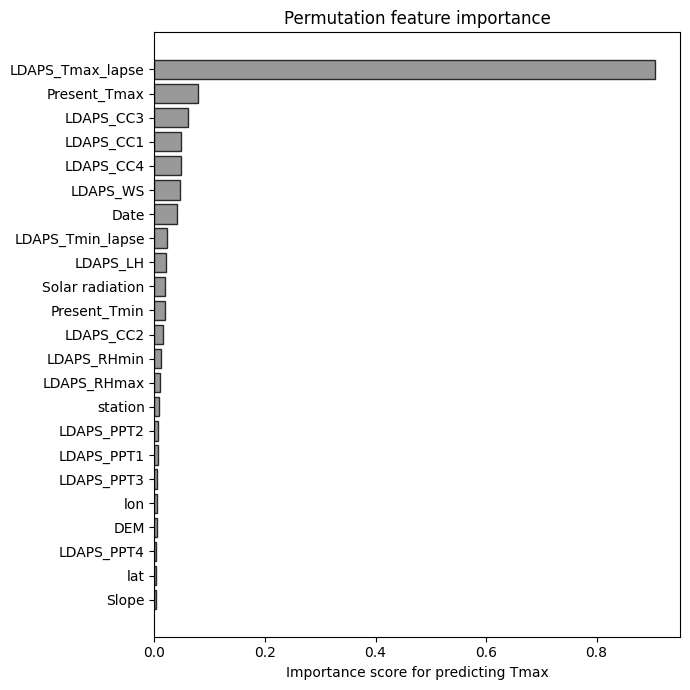

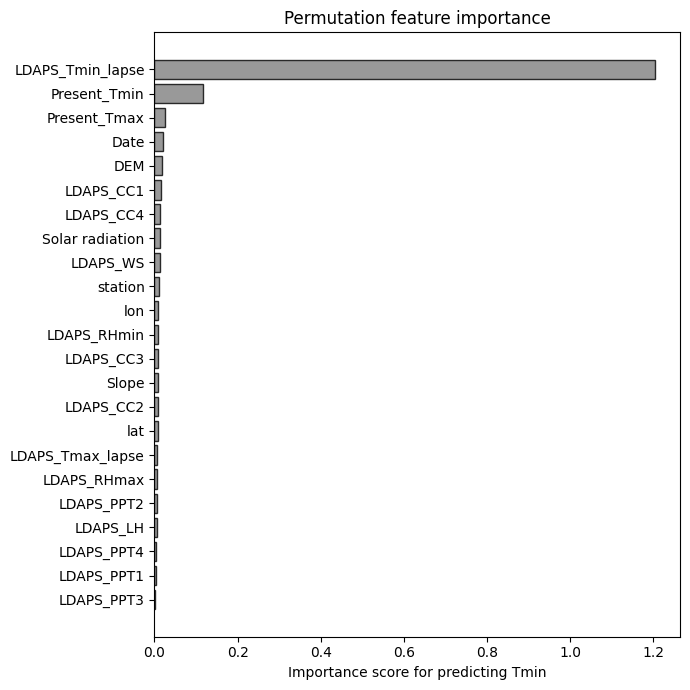

In [17]:
                         ######test and train and find the importance of features in predicting the next day Temperature#########

                #####اجرای این بخش کمی زمانبر است#####
                
### takes less than one minute to run pe patient ####
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.inspection import permutation_importance
import rfpimp


X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y_1, test_size=0.2, random_state=0)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X, y_2, test_size=0.2, random_state=0)
regressor_1_1 = RandomForestRegressor(n_estimators=100)
regressor_2_1 = LinearRegression()
regressor_3_1 = DecisionTreeRegressor()

regressor_1_2 = RandomForestRegressor(n_estimators=100)
regressor_2_2 = LinearRegression()
regressor_3_2 = DecisionTreeRegressor()

regressor_1_1.fit(X_train_1, y_train_1)
regressor_1_2.fit(X_train_2, y_train_2)
y_pred_1_1 = regressor_1_1.predict(X_test_1)
y_pred_1_2 = regressor_1_2.predict(X_test_2)

print("r^2 score for predicting Tmax =",r2_score(y_test_1, y_pred_1_1))
print("r^2 score for predicting Tmin =",r2_score(y_test_2, y_pred_1_2))
print("mean_squared_error of predicting T max= ", mean_squared_error(y_test_1, y_pred_1_1))
print("mean_squared_error of predicting T min= ", mean_squared_error(y_test_2, y_pred_1_2))
print("predicting score of T max= ", regressor_1_1.score(X_test_1, y_test_1))
print("predicting score of T min= ", regressor_1_2.score(X_test_2, y_test_2))

data_frame_1 = pd.DataFrame({'Real Tmaxs':y_test_1.squeeze(), 'Predicted Tmaxs':y_pred_1_1})
data_frame_2 = pd.DataFrame({'Real Tmins':y_test_2.squeeze(), 'Predicted Tmins':y_pred_1_2})

print('\n',data_frame_1)
print('\n',data_frame_2)
print('\n')

predicted_Tmaxs = regressor_1_1.predict(X)
predicted_Tmins = regressor_1_2.predict(X)
single_predicted_Tmax = regressor_1_1.predict(X.tail(1))
print("T max prediction by random forest (0.8 trained) model in last row = " , single_predicted_Tmax[0])
print("The main amount of T max in last row = " , y_1.tail(1).values[0])

single_predicted_Tmin = regressor_1_2.predict(X.tail(1))
print("T max prediction by random forest (0.8 trained) model in last row = " , single_predicted_Tmin[0])
print("The main amount of T min in last row = " , y_2.tail(1).values[0],'\n')


regressor_1_1.fit(X, y_1)

regressor_1_2.fit(X, y_2)

predicted_Tmaxs = regressor_1_1.predict(X)
predicted_Tmins = regressor_1_2.predict(X)

single_predicted_Tmax = regressor_1_1.predict(X.tail(1))
print("T max prediction by random forest model in last row = " , single_predicted_Tmax[0])
print("The main amount of T max in last row = " , y_1.tail(1).values[0])

single_predicted_Tmin = regressor_1_2.predict(X.tail(1))
print("T max prediction by random forest model in last row = " , single_predicted_Tmin[0])
print("The main amount of T min in last row = " , y_2.tail(1).values[0])



imp_1 = rfpimp.importances(regressor_1_1, X, y_1)
fig, ax = plt.subplots(figsize=(7, 7))

ax.barh(imp_1.index, imp_1['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score for predicting Tmax')
ax.set_title('Permutation feature importance')
plt.gca().invert_yaxis()

fig.tight_layout()
plt.savefig("Importance score for predicting Tmax.png")


imp_2= rfpimp.importances(regressor_1_2, X, y_2)
fig, ax = plt.subplots(figsize=(7, 7))

ax.barh(imp_2.index, imp_2['Importance'], height=0.8, facecolor='grey', alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score for predicting Tmin')
ax.set_title('Permutation feature importance')
plt.gca().invert_yaxis()

fig.tight_layout()
plt.savefig("Importance score for predicting Tmin.png")

# perdict_Next_Tmax = regressor_1_1.predict([[25,3,25,27,80,90,19,15,16,40,0.5,0.45,0.48,0.42,5,10,11,14,37.5,127,101,2.1,5001.7]])
# print(perdict_Next_Tmax)
# perdict_Next_Tmin = regressor_1_2.predict([[25,3,25,27,80,90,19,15,16,40,0.5,0.45,0.48,0.42,5,10,11,14,37.5,127,101,2.1,5001.7]])
# print(perdict_Next_Tmin)

## visualization

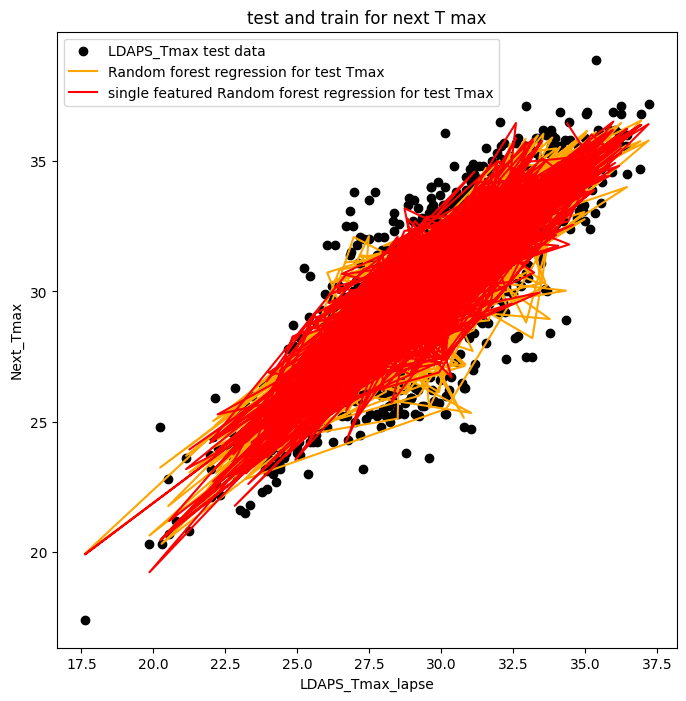

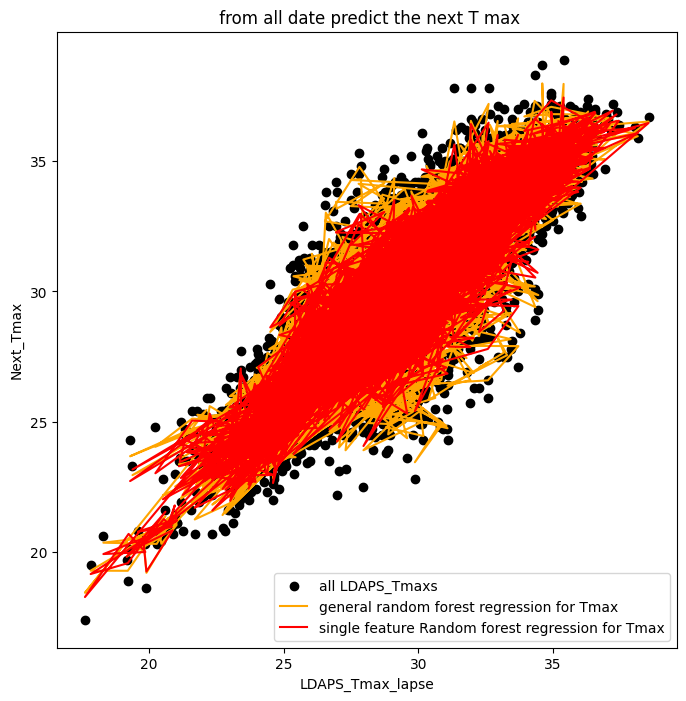

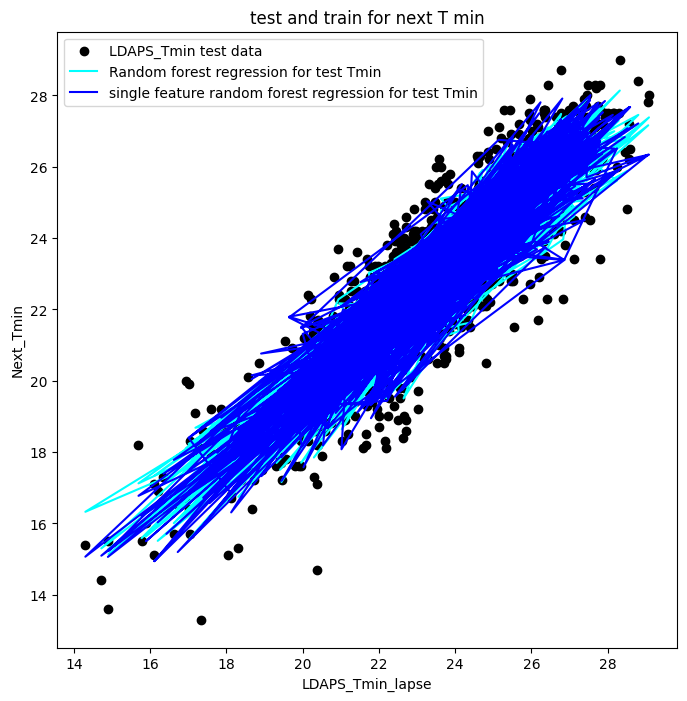

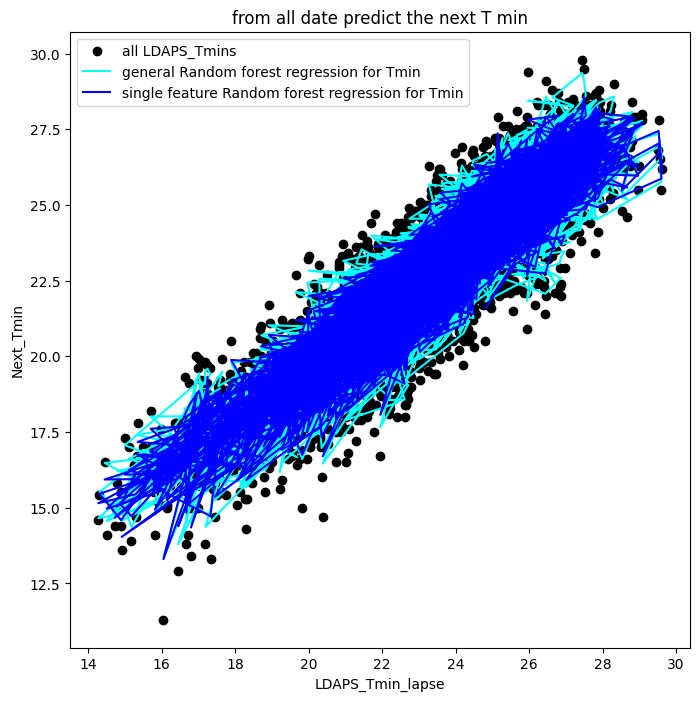

r^2 score for predicting Tmax by LDAPS Tmax =  0.9389135771519174
r^2 score for predicting Tmin by LDAPS Tmin =  0.9560112455149048
mean_squared_error of predicting T max by LDAPS =  0.5914428446970172
mean_squared_error of predicting T min by LDAPS =  0.27100505660390145
r^2 score for predicting Tmax by LDAPS Tmax and predicting by all features = 0.9553205017266322
r^2 score for predicting Tmin by LDAPS Tmin and predicting by all features = 0.9717392846846944
mean_squared_error of predicting T max by LDAPS and by all features =  0.40120773783718944
mean_squared_error of predicting T min by LDAPS and by all features =  0.16201454204331675


In [18]:
    ####### visualisation and pruning by LDAPS T ########
x_1 = df_1['LDAPS_Tmax_lapse'].values.reshape(-1,1)
x_2 = df_1['LDAPS_Tmin_lapse'].values.reshape(-1,1)
T_1 = y_1.values
T_2 = y_2.values

x_1_train, x_1_test, T_1_train, T_1_test = train_test_split(x_1, T_1, test_size=0.2, random_state=0)



fitting_1_test_train = regressor_1_1.fit(x_1_train, T_1_train)
T_1_pred = regressor_1_1.predict(x_1_test)

plt.figure(figsize=(8,8), dpi = 100)
plt.scatter(x_1_test, T_1_test, color='k' , label="LDAPS_Tmax test data")
plt.plot(x_1_test, y_pred_1_1, color='orange', label="Random forest regression for test Tmax")
plt.plot(x_1_test, T_1_pred, color='red', label="single featured Random forest regression for test Tmax")
plt.title("test and train for next T max")
plt.xlabel("LDAPS_Tmax_lapse")
plt.ylabel("Next_Tmax")
plt.legend(facecolor='white')
plt.savefig("test and train visualization for T max.png")
plt.show()

fitting_1 = regressor_1_1.fit(x_1,T_1)
prediction_Tmax = fitting_1.predict(x_1)

plt.figure(figsize=(8,8), dpi = 100)
plt.scatter(x_1, T_1, color='k' , label="all LDAPS_Tmaxs")
plt.plot(x_1, predicted_Tmaxs, color='orange', label="general random forest regression for Tmax")
plt.plot(x_1, prediction_Tmax , color='red', label="single feature Random forest regression for Tmax")
plt.title(" from all date predict the next T max")
plt.xlabel("LDAPS_Tmax_lapse")
plt.ylabel("Next_Tmax")
plt.legend(facecolor='white')
plt.savefig("general visualization for T max.png")
plt.show()

x_2_train, x_2_test, T_2_train, T_2_test = train_test_split(x_2, T_2, test_size=0.2, random_state=0)



fitting_2_test_train = regressor_1_2.fit(x_2_train,T_2_train)
T_2_pred = regressor_1_2.predict(x_2_test)

plt.figure(figsize=(8,8), dpi = 100)
plt.scatter(x_2_test, T_2_test, color ='k' , label="LDAPS_Tmin test data")
plt.plot(x_2_test, y_pred_1_2, color='aqua', label="Random forest regression for test Tmin")
plt.plot(x_2_test, T_2_pred, color='blue', label="single feature random forest regression for test Tmin")
plt.title("test and train for next T min")
plt.xlabel("LDAPS_Tmin_lapse")
plt.ylabel("Next_Tmin")
plt.legend(facecolor='white')
plt.savefig("test and train visualization for T min.png")
plt.show()

fitting_2 = regressor_1_2.fit(x_2,T_2 )
prediction_Tmin = regressor_1_2.predict(x_2)

plt.figure(figsize=(8,8), dpi = 100)
plt.scatter(x_2, T_2, color ='k' , label="all LDAPS_Tmins")
plt.plot(x_2, predicted_Tmins, color='aqua', label="general Random forest regression for Tmin")
plt.plot(x_2, prediction_Tmin, color='blue', label="single feature Random forest regression for Tmin")
plt.title("from all date predict the next T min")
plt.xlabel("LDAPS_Tmin_lapse")
plt.ylabel("Next_Tmin")
plt.legend(facecolor='white')
plt.savefig("general visualization for T min.png")
plt.show()

print("r^2 score for predicting Tmax by LDAPS Tmax = ",r2_score(T_1, prediction_Tmax))
print("r^2 score for predicting Tmin by LDAPS Tmin = ",r2_score(T_2, prediction_Tmin))

print("mean_squared_error of predicting T max by LDAPS = ", mean_squared_error(T_1, prediction_Tmax))
print("mean_squared_error of predicting T min by LDAPS = ", mean_squared_error(T_2, prediction_Tmin))

print("r^2 score for predicting Tmax by LDAPS Tmax and predicting by all features =",r2_score(predicted_Tmaxs, prediction_Tmax))
print("r^2 score for predicting Tmin by LDAPS Tmin and predicting by all features =",r2_score(predicted_Tmins, prediction_Tmin))

print("mean_squared_error of predicting T max by LDAPS and by all features = ", mean_squared_error(predicted_Tmaxs, prediction_Tmax))
print("mean_squared_error of predicting T min by LDAPS and by all features = ", mean_squared_error(predicted_Tmins, prediction_Tmin))





## ensemble by voting amond three regression models




Random forest regressor difference for Tmax =  0.00013941240798262454
Linear regression difference for Tmax =  0.012244984707844665
Decision tree regressor difference for Tmax =  -0.010103206639636379


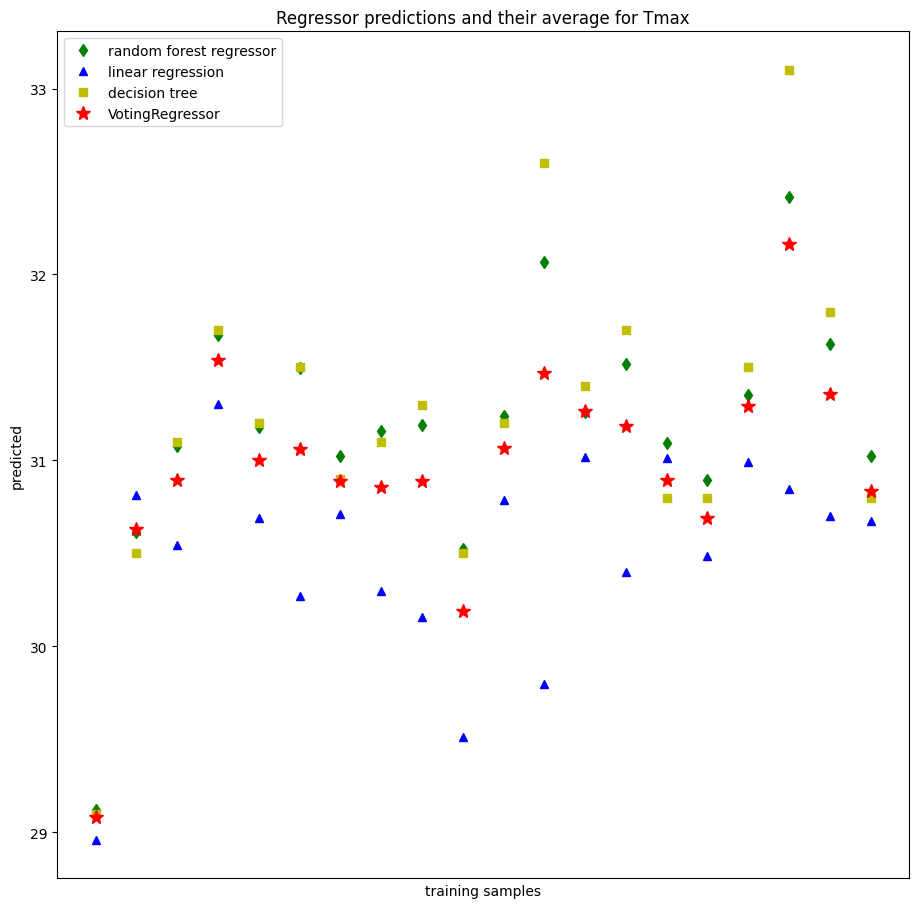

Random forest regressor difference for Tmin =  -0.0020562822038982915
Linear regression difference for Tmin =  0.011782802503034482
Decision tree regressor difference for Tmin =  -0.01140342506104128


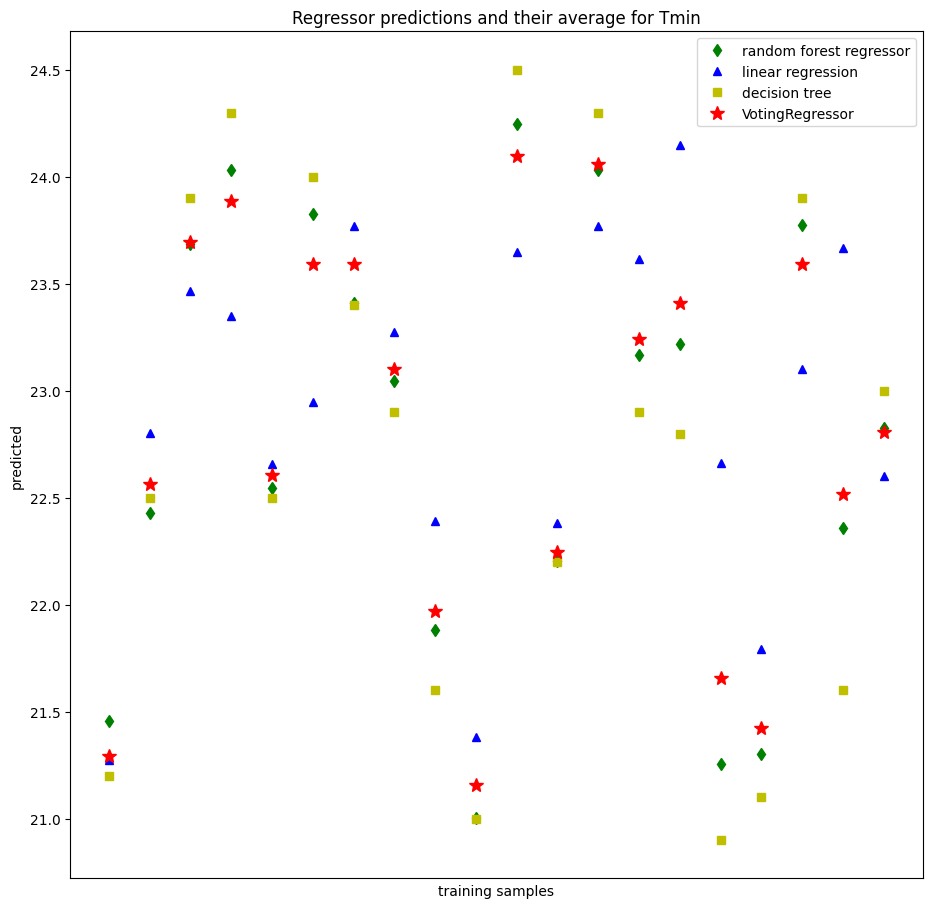

In [19]:
   ####ensemble###

   #####اجرای این بخش کمی زمان میبرد######
from sklearn.ensemble import VotingRegressor

regressor_1_1.fit(X, y_1)
regressor_1_2.fit(X, y_2)


regressor_2_1.fit(X, y_1)
regressor_2_2.fit(X, y_2)

regressor_3_1.fit(X, y_1)
regressor_3_2.fit(X, y_2)


ereg_1 = VotingRegressor(estimators=[('random forest', regressor_1_1), ('linear regression', regressor_2_1), ('decision tree', regressor_3_1)])
ereg_1 = ereg_1.fit(X, y_1)


pred1a = regressor_1_1.predict(X[:20])
pred2a = regressor_2_1.predict(X[:20])
pred3a = regressor_3_1.predict(X[:20])
pred4a = ereg_1.predict(X[:20])

pred1 = regressor_1_1.predict(X[:4200])
pred2 = regressor_2_1.predict(X[:4200])
pred3 = regressor_3_1.predict(X[:4200])
pred4 = ereg_1.predict(X[:4200])

print("Random forest regressor difference for Tmax = ", np.mean(pred1 - pred4))
print("Linear regression difference for Tmax = ", np.mean(pred2 - pred4))
print("Decision tree regressor difference for Tmax = ", np.mean(pred3 - pred4))


plt.figure(figsize = (11,11))
plt.plot(pred1a, "gd", label="random forest regressor")
plt.plot(pred2a, "b^", label="linear regression")
plt.plot(pred3a, "ys", label="decision tree")
plt.plot(pred4a, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend()
plt.title("Regressor predictions and their average for Tmax")
plt.savefig("reg_ensemble_Tmax.png")
plt.show()


ereg_2 = VotingRegressor(estimators=[('random forest', regressor_1_2), ('linear regression', regressor_2_2), ('decision tree', regressor_3_2)])
ereg_2 = ereg_2.fit(X, y_2)

pred11a = regressor_1_2.predict(X[:20])
pred22a = regressor_2_2.predict(X[:20])
pred33a = regressor_3_2.predict(X[:20])
pred44a = ereg_2.predict(X[:20])

pred11 = regressor_1_2.predict(X[:4200])
pred22 = regressor_2_2.predict(X[:4200])
pred33 = regressor_3_2.predict(X[:4200])
pred44 = ereg_2.predict(X[:4200])

print("Random forest regressor difference for Tmin = ", np.mean(pred11 - pred44))
print("Linear regression difference for Tmin = ", np.mean(pred22 - pred44))
print("Decision tree regressor difference for Tmin = ", np.mean(pred33 - pred44))
#print(pred44)

plt.figure(figsize = (11,11))
plt.plot(pred11a, "gd", label="random forest regressor")
plt.plot(pred22a, "b^", label="linear regression")
plt.plot(pred33a, "ys", label="decision tree")
plt.plot(pred44a, "r*", ms=10, label="VotingRegressor")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend()
plt.title("Regressor predictions and their average for Tmin")
plt.savefig("reg_ensemble_Tmin.png")
plt.show()



## K_fold cross validation for regression

In [20]:
   #####اجرای این بخش کمی زمانبر است#####
   ####k_fold cross validation#####

from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits = 5)
scores = cross_val_score(regressor_1_1, X, y_1, cv = k_folds, scoring='r2')

print("Average CV Score for random forest regression by k_fold  for predicting Tmax by all features: ", scores.mean())
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("Number of CV Scores used in Average for random forest regressor: ", len(scores))
print("Cross Validation Scores for random forest regressor by k_fold: ", scores)
print('\n')

k_folds = KFold(n_splits = 5)
scores = cross_val_score(regressor_1_2, X, y_2, cv = k_folds, scoring='r2')

print("Average CV Score for random forest regression by k_fold  for predicting Tmin by all features: ", scores.mean())
print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print("Number of CV Scores used in Average for random forest regressor: ", len(scores))
print("Cross Validation Scores for random forest regressor by k_fold: ", scores)
print('\n')


Average CV Score for random forest regression by k_fold  for predicting Tmax by all features:  0.6539900537183353
Mean score of 0.65 with a standard deviation of 0.12
Number of CV Scores used in Average for random forest regressor:  5
Cross Validation Scores for random forest regressor by k_fold:  [0.69009404 0.67106866 0.65196242 0.80832888 0.44849626]


Average CV Score for random forest regression by k_fold  for predicting Tmin by all features:  0.7795998751491776
Mean score of 0.78 with a standard deviation of 0.09
Number of CV Scores used in Average for random forest regressor:  5
Cross Validation Scores for random forest regressor by k_fold:  [0.67410498 0.67949233 0.81802575 0.87040391 0.8559724 ]




# STATISTICAL OPERATIONS

In [21]:
             ###### statistical operations#####
from scipy import stats
print("features type is: ", type(X))
print("target Temperatures type is: ", type(Y))
print("T max series type is: ", type(y_1))
print("T min series type is: ", type(y_2))
print('\n')
X_op = np.array(X)
print("our features are:", '\n', X_op)
print('\n')
print("  max and min temperatures are: ", '\n', np.array(Y))
print('\n')
print("mean value of maximum temperatures= ", np.mean(y_1))
print("mean value of minimum temperatures= ", np.mean(y_2))
print('\n')
print("median of maximum temperatures= ", np.median(y_1))
print("median of minimum temperatures= ", np.median(y_2))
print('\n')
print("mode of maximum temperatures= ", stats.mode(y_1))
print("mode of minumum temperatures= ", stats.mode(y_2))
print('\n')
print("standard deviation of maximum temperatures= ", np.std(y_1))
print("standard deviation of minimum temperatures= ", np.std(y_2))
print('\n')
print("variance of maximum temperatures= ", np.var(y_1))
print("variance of minimum temperatures= ", np.var(y_2))
print('\n')

features type is:  <class 'pandas.core.frame.DataFrame'>
target Temperatures type is:  <class 'pandas.core.frame.DataFrame'>
T max series type is:  <class 'pandas.core.series.Series'>
T min series type is:  <class 'pandas.core.series.Series'>


our features are: 
 [[1.00000000e+00 1.00000000e+00 2.87000000e+01 ... 2.12335000e+02
  2.78500000e+00 5.99289600e+03]
 [2.00000000e+00 1.00000000e+00 3.19000000e+01 ... 4.47624000e+01
  5.14100000e-01 5.86931250e+03]
 [3.00000000e+00 1.00000000e+00 3.16000000e+01 ... 3.33068000e+01
  2.66100000e-01 5.86355566e+03]
 ...
 [2.30000000e+01 3.10000000e+02 2.33000000e+01 ... 1.55876000e+01
  1.55400000e-01 4.44331397e+03]
 [2.40000000e+01 3.10000000e+02 2.33000000e+01 ... 1.72956000e+01
  2.22300000e-01 4.43837353e+03]
 [2.50000000e+01 3.10000000e+02 2.32000000e+01 ... 1.95844000e+01
  2.71300000e-01 4.45134522e+03]]


  max and min temperatures are:  
 [[29.1 21.2]
 [30.5 22.5]
 [31.1 23.9]
 ...
 [28.3 18.1]
 [28.6 18.8]
 [27.8 17.4]]


mean value o

# CLASSIFICATION


In [22]:
####importing main librarries

# import pandas as pd
# from pandas.io.formats.info import DataFrameTableBuilderVerbose
# import math
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy as sp
# import io

#####in ca_cervix column, "0" means that observed person has no cancer & "1" means that observed person has cervix cancer####
df_2 = pd.read_csv('sobar-72.csv')


dfStyler = df_2.style.set_properties(**{'text-align': 'left'})
dfStyler.set_table_styles([dict(selector='th', props=[('text-align', 'left')])])

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1
5,10,14,8,6,15,8,10,1,3,4,2,14,8,7,2,7,13,9,6,1
6,10,15,4,6,14,6,10,5,3,7,2,7,13,3,3,15,3,3,5,1
7,8,12,9,10,10,5,10,5,5,5,2,10,9,13,2,9,8,7,12,1
8,10,15,7,2,15,6,10,1,3,5,2,9,15,13,10,15,13,15,15,1
9,7,15,7,6,11,8,8,5,3,3,4,15,3,8,2,9,3,4,4,1


In [23]:
   ####defining features and target####
features_2 = ['behavior_sexualRisk', 'behavior_eating', 'behavior_personalHygine', 'intention_aggregation',	'intention_commitment',	'attitude_consistency',	'attitude_spontaneity',	'norm_significantPerson',	'norm_fulfillment',	'perception_vulnerability',	'perception_severity',	'motivation_strength',	'motivation_willingness',	'socialSupport_emotionality',	'socialSupport_appreciation',	'socialSupport_instrumental',	'empowerment_knowledge',	'empowerment_abilities',	'empowerment_desires']
output_2 = ['ca_cervix']
x = df_2[features_2]
y = df_2[output_2]
print(x)
print('\n')
print(y)

    behavior_sexualRisk  behavior_eating  behavior_personalHygine  \
0                    10               13                       12   
1                    10               11                       11   
2                    10               15                        3   
3                    10               11                       10   
4                     8               11                        7   
..                  ...              ...                      ...   
67                   10               14                       14   
68                   10               12                       15   
69                   10                8                       11   
70                    9               12                       13   
71                   10               14                       14   

    intention_aggregation  intention_commitment  attitude_consistency  \
0                       4                     7                     9   
1                      10

In [24]:
     ##########seeking for NaNs##########
print(df_2.isnull().sum()) 
df_2.shape

behavior_sexualRisk           0
behavior_eating               0
behavior_personalHygine       0
intention_aggregation         0
intention_commitment          0
attitude_consistency          0
attitude_spontaneity          0
norm_significantPerson        0
norm_fulfillment              0
perception_vulnerability      0
perception_severity           0
motivation_strength           0
motivation_willingness        0
socialSupport_emotionality    0
socialSupport_appreciation    0
socialSupport_instrumental    0
empowerment_knowledge         0
empowerment_abilities         0
empowerment_desires           0
ca_cervix                     0
dtype: int64


(72, 20)

In [25]:
df_2.describe()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,9.666667,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,0.291667
std,1.186782,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,0.457719
min,2.000000,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,0.000000
25%,10.000000,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,0.000000
50%,10.000000,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,0.000000
75%,10.000000,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,1.000000
max,10.000000,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,1.000000


In [26]:
import sys
!{sys.executable} -m pip install seaborn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


ca_cervix
0            51
1            21
dtype: int64


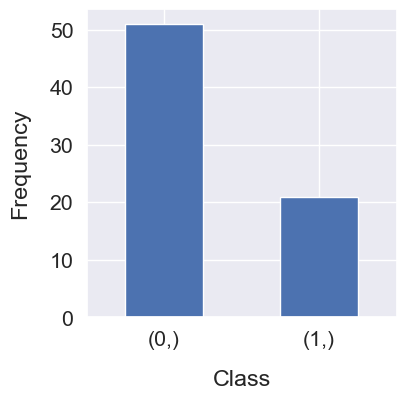

In [27]:
print(y.value_counts())
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
sn.set(font_scale=1.4)
y.value_counts().plot(kind='bar', figsize=(4, 4), rot=0)
plt.xlabel("Class", labelpad=14)
plt.ylabel("Frequency", labelpad=14)
plt.savefig("Dataset.png")
plt.show()

## decision tree classifier

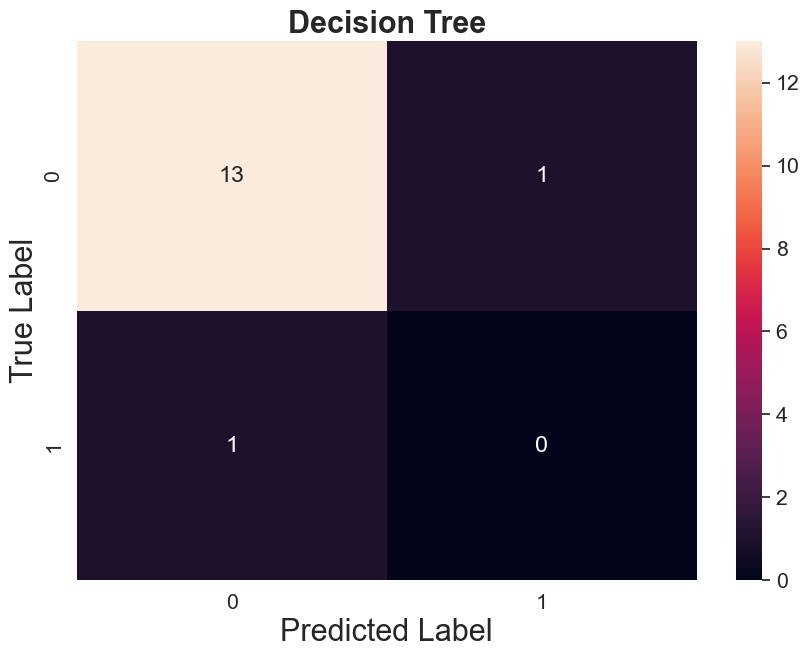

In [28]:
    ##### confusion matrix of decision tree classification model ####
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sn
dtree_clf = DecisionTreeClassifier()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

dtree_clf.fit(x_train, y_train)
dtree_predictions = dtree_clf.predict(x_test)
cm = confusion_matrix(y_test, dtree_predictions, labels=dtree_clf.classes_)

df_cfm = pd.DataFrame(cm, index = dtree_clf.classes_, columns = dtree_clf.classes_)
plt.figure(figsize = (10,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("Decision Tree", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
cfm_plot.figure.savefig("cfm_DT.png")

In [29]:
# from sklearn import tree
# import graphviz 
# dot_data = tree.export_graphviz(dtree_clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("Tree")

In [30]:
from sklearn.metrics import classification_report
report = classification_report(y_test, dtree_predictions, target_names = dtree_clf.classes_, zero_division = 0, output_dict=True)
df = pd.DataFrame(report).transpose()
df.to_csv("Report_DT.csv")

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_7068\3884448692.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rforest_clf.fit(X_train, y_train)


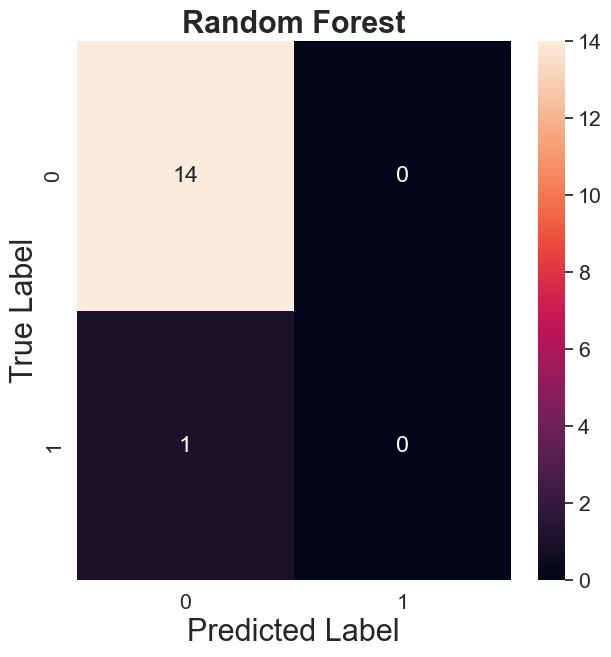

In [31]:
    ##### confusion matrix of random forest classification model ####
from sklearn.ensemble import RandomForestClassifier
rforest_clf = RandomForestClassifier()
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sn

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
rforest_clf.fit(X_train, y_train)

predictions = rforest_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=rforest_clf.classes_)

df_cfm = pd.DataFrame(cm, index = rforest_clf.classes_, columns = rforest_clf.classes_)
plt.figure(figsize = (7,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("Random Forest", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
cfm_plot.figure.savefig("cfm_RF.png")

## random forest classifier

c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


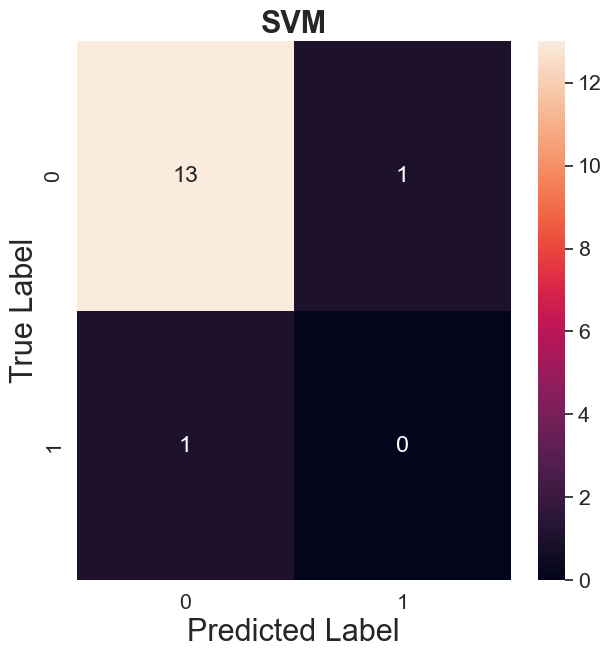

In [32]:
    ##### confusion matrix of svm classification model ####
from sklearn import svm
svm_clf = svm.LinearSVC()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sn

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
svm_clf.fit(X_train, y_train)

predictions = svm_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=svm_clf.classes_)

df_cfm = pd.DataFrame(cm, index = svm_clf.classes_, columns = svm_clf.classes_)
plt.figure(figsize = (7,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("SVM", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
cfm_plot.figure.savefig("cfm_SVM.png")

## logistic regression

c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


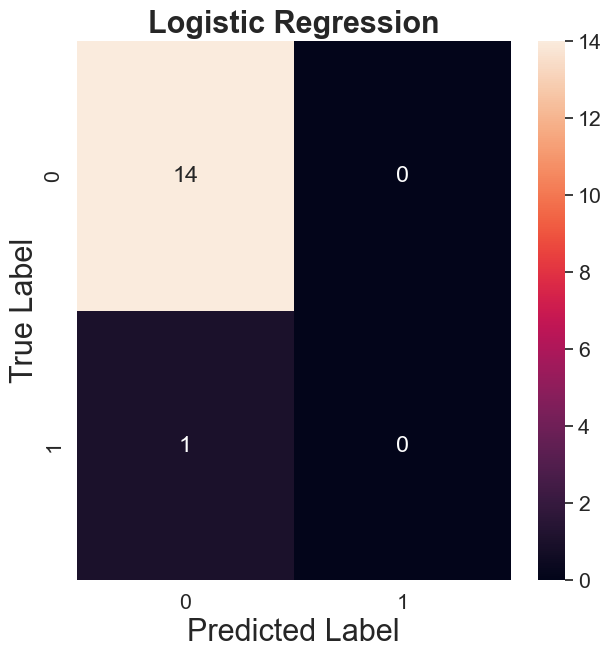

In [33]:
    ##### confusion matrix of logistic regression model ####
from sklearn.linear_model import LogisticRegression
log_reg_clf = LogisticRegression()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sn

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
log_reg_clf.fit(X_train, y_train)

predictions = log_reg_clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=log_reg_clf.classes_)

df_cfm = pd.DataFrame(cm, index = log_reg_clf.classes_, columns = log_reg_clf.classes_)
plt.figure(figsize = (7,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("Logistic Regression", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
cfm_plot.figure.savefig("cfm_LR.png")

## gaussian naive bayas classifier

c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


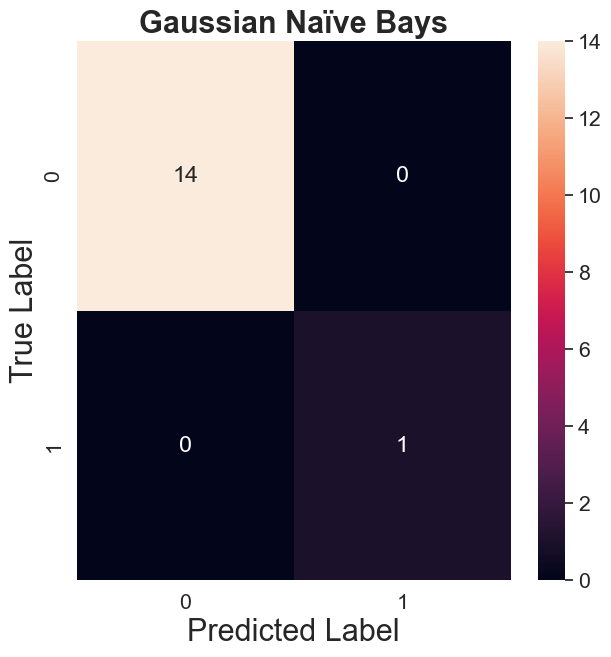

In [34]:
         ####using gaussian naive bays classification####
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sn

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
gnb_clf.fit(X_train, y_train)

gnb_predictions = gnb_clf.predict(X_test)
cm = confusion_matrix(y_test, gnb_predictions, labels=gnb_clf.classes_)

df_cfm = pd.DataFrame(cm, index = gnb_clf.classes_, columns = gnb_clf.classes_)
plt.figure(figsize = (7,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("Gaussian Naïve Bays", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
cfm_plot.figure.savefig("cfm_GNB.png")

In [35]:
from sklearn.metrics import classification_report
report = classification_report(y_test, gnb_predictions, target_names = gnb_clf.classes_, labels=gnb_clf.classes_, zero_division = 0, output_dict=True)
df_gnb = pd.DataFrame(report).transpose()
df_gnb.to_csv("Report_GNB.csv") 

## k nearest neighbors classifier

c:\Users\Lenovo\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


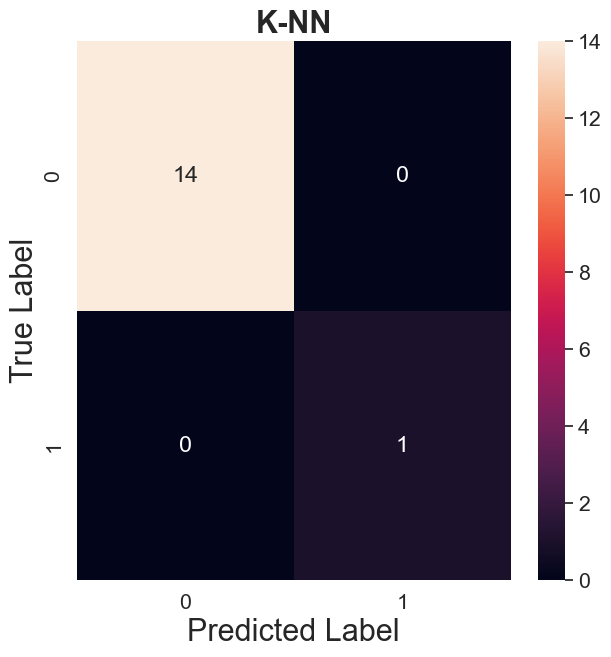

In [36]:
        ####using k nearest neighbors classification####
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_neighbors=1,)

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import seaborn as sn

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size =0.2, random_state=0)
knn_clf.fit(X_train, y_train)

knn_predictions = knn_clf.predict(X_test)
cm = confusion_matrix(y_test, knn_predictions, labels=knn_clf.classes_)

df_cfm = pd.DataFrame(cm, index = knn_clf.classes_, columns = knn_clf.classes_)
plt.figure(figsize = (7,7))
cfm_plot = sn.heatmap(df_cfm, annot=True)
plt.title("K-NN", fontsize = 22, fontweight="bold")
plt.xlabel("Predicted Label", fontsize = 22)
plt.ylabel("True Label", fontsize = 22)
sn.set(font_scale=1.4)
cfm_plot.figure.savefig("cfm_KNN.png")

In [37]:
from sklearn.metrics import classification_report
report = classification_report(y_test, knn_predictions, target_names = knn_clf.classes_, labels=knn_clf.classes_, zero_division = 0, output_dict=True)
df_knn = pd.DataFrame(report).transpose()
df_knn.to_csv("Report_KNN.csv") 

## roc and auc for Knn and Gnb

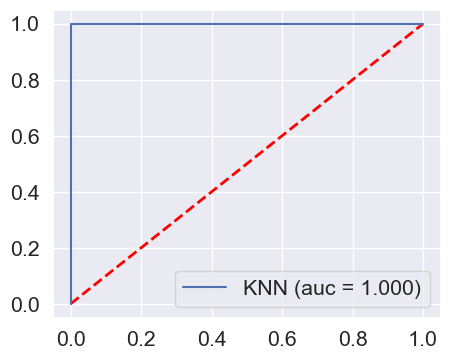

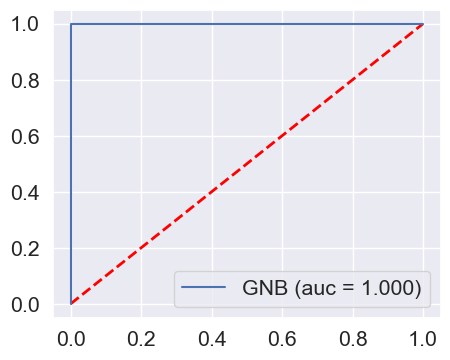

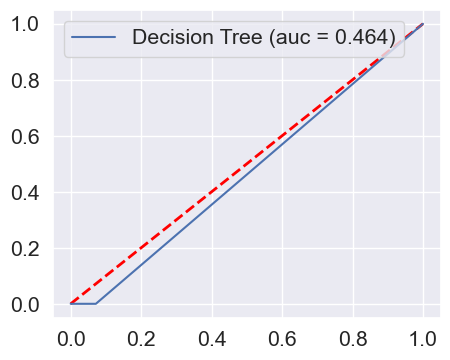

In [38]:
      ####roc and auc for knn knn gnb ####
# from itertools import cycle

from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.metrics import roc_auc_score

knn_fpr, knn_tpr, threshold = roc_curve(y_test,knn_predictions)
gnb_fpr, gnb_tpr, threshold = roc_curve(y_test,gnb_predictions)
dtree_fpr, dtree_tpr, threshold = roc_curve(y_test,dtree_predictions)
auc_knn = auc(knn_fpr, knn_tpr)
auc_gnb = auc(gnb_fpr, gnb_tpr)
auc_dtree = auc(dtree_fpr, dtree_tpr)
plt.figure(figsize=(5,4), dpi = 100)
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.plot(knn_fpr, knn_tpr, linestyle='-', label='KNN (auc = %0.3f)' %auc_knn)
plt.legend()
plt.savefig("knn roc.png")
plt.show()

plt.figure(figsize=(5,4), dpi = 100)
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.plot(gnb_fpr, gnb_tpr, linestyle='-', label='GNB (auc = %0.3f)' %auc_gnb)
plt.legend()
plt.savefig("gnb roc.png")
plt.show()

plt.figure(figsize=(5,4), dpi = 100)
plt.plot([0, 1], [0, 1], color="red", lw=2, linestyle="--")
plt.plot(dtree_fpr, dtree_tpr, linestyle='-', label='Decision Tree (auc = %0.3f)' %auc_dtree)
plt.legend()
plt.savefig("dtree roc.png")
plt.show()

## kfold and stratified Kfold cross validation for knn and GNB and dtree classification

In [39]:
       ####using k_fold and sk_fold to check our models(knn and gnb and decision tree)####
from sklearn.model_selection import KFold,StratifiedKFold, cross_val_score

k_folds = KFold(n_splits = 10)
scores = cross_val_score(knn_clf, x, y, cv = k_folds)

print("Average CV Score for knn by k_fold: ", scores.mean())
print("Number of CV Scores used in Average for knn: ", len(scores))
print("Cross Validation Scores for knn by k_fold: ", scores)
print('\n')

scores = cross_val_score(gnb_clf, x, y, cv = k_folds)

print("Average CV Score for gnb by k_fold: ", scores.mean())
print("Number of CV Scores used in Average for gnb: ", len(scores))
print("Cross Validation Scores for gnb by k_fold: ", scores)
print('\n')

scores = cross_val_score(dtree_clf, x, y, cv = k_folds)

print("Average CV Score for decision tree by k_fold: ", scores.mean())
print("Number of CV Scores used in Average for decision tree: ", len(scores))
print("Cross Validation Scores for decision tree by k_fold: ", scores)
print(3*'\n')
sk_folds = StratifiedKFold(n_splits = 10)

scores = cross_val_score(knn_clf, x, y, cv = sk_folds)

print("Average CV Score for knn by sk_fold: ", scores.mean())
print("Number of CV Scores used in Average for knn: ", len(scores))
print("Cross Validation Scores for knn by sk_fold: ", scores)
print('\n')
scores = cross_val_score(gnb_clf, x, y, cv = sk_folds)

print("Average CV Score for gnb by sk_fold: ", scores.mean())
print("Number of CV Scores used in Average for gnb: ", len(scores))
print("Cross Validation Scores for gnb by sk_fold: ", scores)
print("\n")

scores = cross_val_score(dtree_clf, x, y, cv = sk_folds)

print("Average CV Score for decision tree by sk_fold: ", scores.mean())
print("Number of CV Scores used in Average for decision tree: ", len(scores))
print("Cross Validation Scores for decision tree by sk_fold: ", scores)


Average CV Score for knn by k_fold:  0.8375
Number of CV Scores used in Average for knn:  10
Cross Validation Scores for knn by k_fold:  [0.625      0.75       0.71428571 0.71428571 0.85714286 0.71428571
 1.         1.         1.         1.        ]


Average CV Score for gnb by k_fold:  0.8625
Number of CV Scores used in Average for gnb:  10
Cross Validation Scores for gnb by k_fold:  [0.875      0.75       0.71428571 0.85714286 1.         0.85714286
 0.85714286 1.         0.71428571 1.        ]


Average CV Score for decision tree by k_fold:  0.825
Number of CV Scores used in Average for decision tree:  10
Cross Validation Scores for decision tree by k_fold:  [0.5        0.75       0.85714286 0.85714286 0.85714286 0.71428571
 1.         0.71428571 1.         1.        ]




Average CV Score for knn by sk_fold:  0.9017857142857142
Number of CV Scores used in Average for knn:  10
Cross Validation Scores for knn by sk_fold:  [1.         0.875      0.71428571 0.57142857 1.         1.
 1.

c:\Users\Lenovo\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), 

## ensemble by voting among three classification models

c:\Users\Lenovo\python\lib\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\Lenovo\python\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\python\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Lenovo\python\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

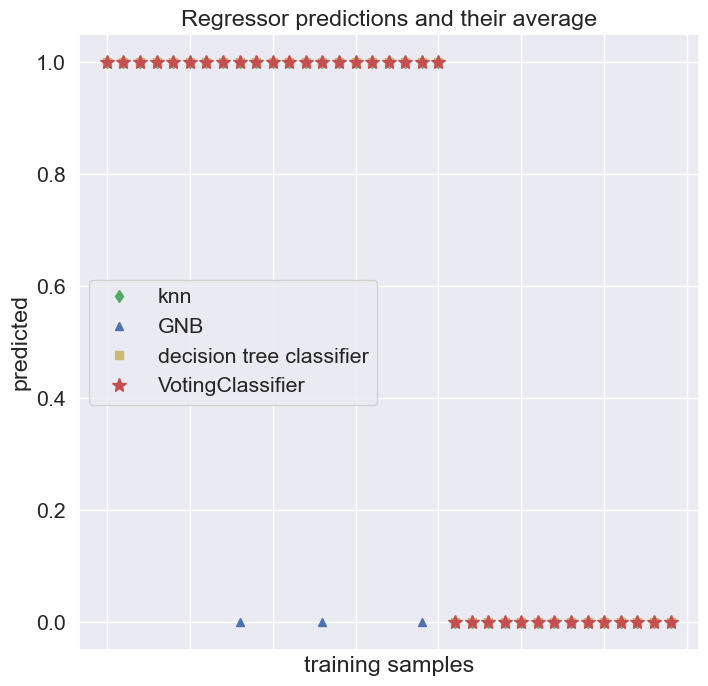

In [40]:
   ####classification ensemble#####
from sklearn.ensemble import VotingClassifier

knn_clf = knn_clf.fit(x, y)
gnb_clf = gnb_clf.fit(x, y)
dtree_clf = dtree_clf.fit(x, y)
eclf = VotingClassifier(estimators=[('knn', knn_clf), ('GNB', gnb_clf), ('decision tree classifier', dtree_clf)])
eclf = eclf.fit(x, y)

predclf1 = knn_clf.predict(x[:35])
predclf2 = gnb_clf.predict(x[:35])
predclf3 = dtree_clf.predict(x[:35])
predclf4 = eclf.predict(x[:35])

plt.figure(figsize = (8,8))
plt.plot(predclf1, "gd", label="knn")
plt.plot(predclf2, "b^", label="GNB")
plt.plot(predclf3, "ys", label="decision tree classifier")
plt.plot(predclf4, "r*", ms=10, label="VotingClassifier")

plt.tick_params(axis="x", which="both", bottom=False, top=False, labelbottom=False)
plt.ylabel("predicted")
plt.xlabel("training samples")
plt.legend(loc="best")
plt.title("Regressor predictions and their average")
plt.savefig("reg_ensemble.png")
plt.show()


# CLUSTERING

predicting cervic cancer by k_means method:  [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 1]


predicting cervic cancer by hierarchical method:  [0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 0 0 0]


predicting cervic cancer by spectral method:  [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


observed people (1 means positive cervic cancer and 0 means negative cervic cancer):  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


predicted number of people having cervic cancer by k_means=  29 	 predicted number of healthy people by k_means=  43
predicted number of people having cervic cancer by agglomera

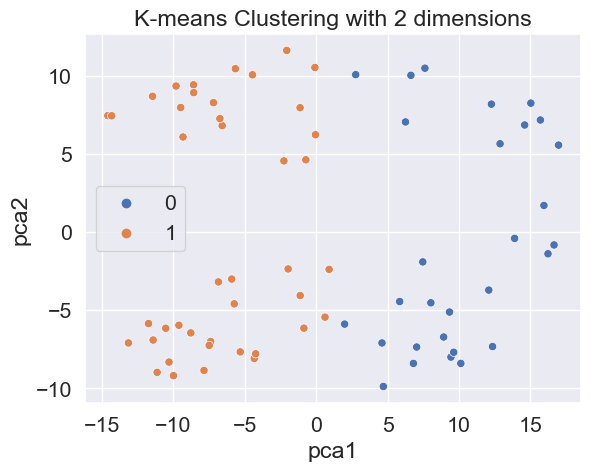

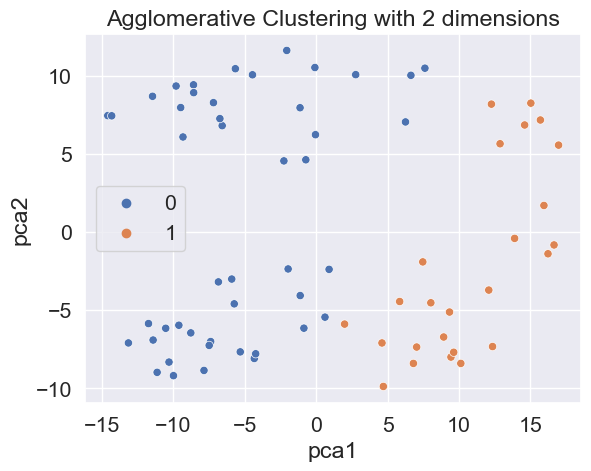

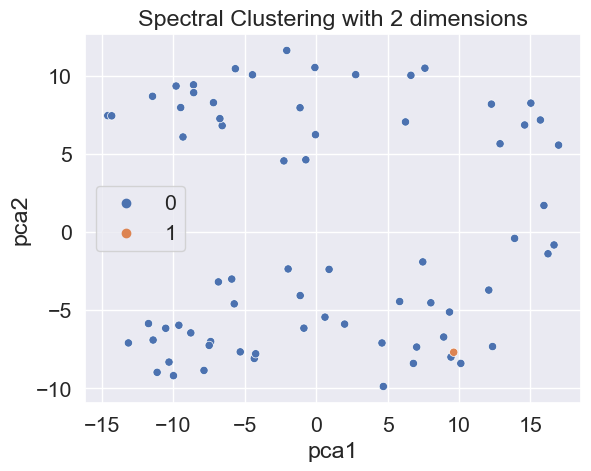

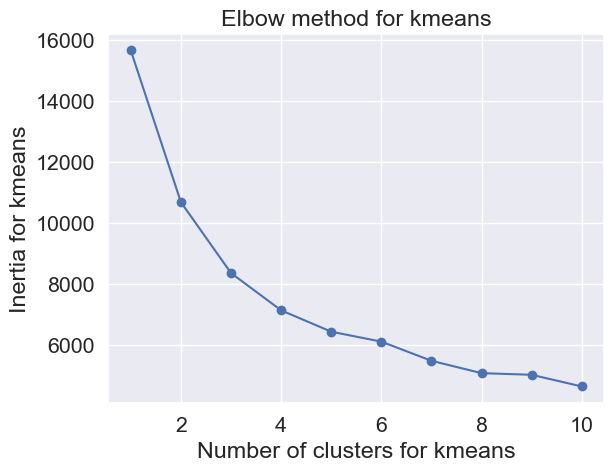

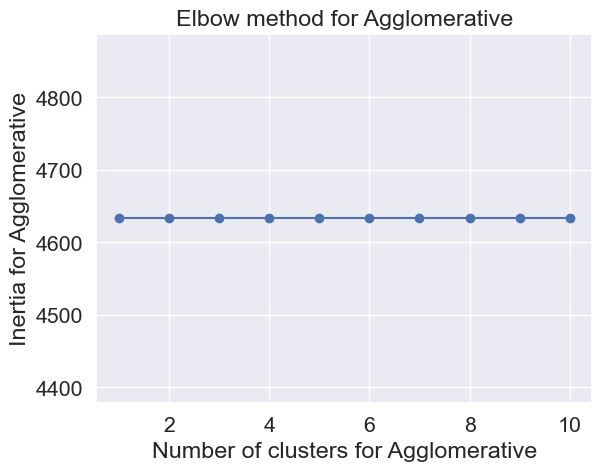

c:\Users\Lenovo\python\lib\site-packages\sklearn\cluster\_kmeans.py:379: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  est = KMeans(
c:\Users\Lenovo\python\lib\site-packages\sklearn\cluster\_kmeans.py:379: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  est = KMeans(
c:\Users\Lenovo\python\lib\site-packages\sklearn\cluster\_kmeans.py:379: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  est = KMeans(
c:\Users\Lenovo\python\lib\site-packages\sklearn\cluster\_kmeans.py:379: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  est = KMeans(
c:\Users\Lenovo\python\lib\site-packages\sklearn\cluster\_kmeans.py:379: ConvergenceWarning: Number of distinct clusters (7) found smaller t

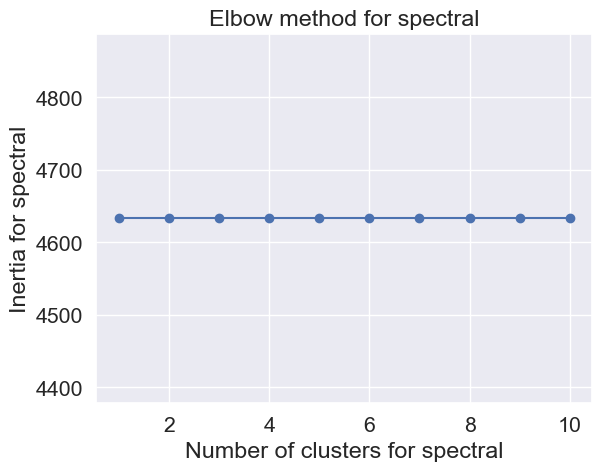

In [41]:
            ####clustering with k_means and agglomerative and spectral methods####
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering, KMeans, SpectralClustering
from sklearn.decomposition import PCA
import seaborn as sn

  ### defining models ###
kmeans = KMeans(n_clusters=2)
y_c = kmeans.fit_predict(x)
hierarchical_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
y_c_1 = hierarchical_cluster.fit_predict(x)
spectral_cluster = SpectralClustering(n_clusters=2)
y_c_2 = spectral_cluster.fit_predict(x)
print("predicting cervic cancer by k_means method: ", y_c)
print('\n')
print("predicting cervic cancer by hierarchical method: ", y_c_1)
print('\n')
print("predicting cervic cancer by spectral method: ", y_c_2)
print('\n')
print("observed people (1 means positive cervic cancer and 0 means negative cervic cancer): ", y.values.ravel())
print('\n')

iterator_k_means_sick = 0
iterator_k_means_healthy = 0

for i in y_c:
  if y_c[i] == 1:
    iterator_k_means_sick += 1
  else:
    iterator_k_means_healthy += 1

print("predicted number of people having cervic cancer by k_means= ", iterator_k_means_sick,'\t', "predicted number of healthy people by k_means= ", iterator_k_means_healthy)

iterator_agglomerativeclustering_sick = 0
iterator_agglomerativeclustering_healthy = 0

for i in y_c_1:
  if y_c_1[i] == 1:
    iterator_agglomerativeclustering_sick += 1
  else:
    iterator_agglomerativeclustering_healthy += 1

print("predicted number of people having cervic cancer by agglomerativeclustering= ", iterator_agglomerativeclustering_sick,'\t', "predicted number of healthy people by agglomerativeclustering= ", iterator_agglomerativeclustering_healthy)

iterator_spectral_sick = 0
iterator_spectral_healthy = 0

for i in y_c_2:
  if y_c[i] == 1:
    iterator_spectral_sick += 1
  else:
    iterator_spectral_healthy += 1

print("predicted number of people having cervic cancer by spectral= ", iterator_spectral_sick,'\t', "predicted number of healthy people by spectral= ", iterator_spectral_healthy)

iterator_sick = 0
iterator_healthy = 0
yyy = list(y.values)

for i in yyy:
  if i == 1:
    iterator_sick += 1
  else:
    iterator_healthy += 1

print("observed number of people having cervic cancer= ", iterator_sick,'\t', "observed number of healthy people= ", iterator_healthy)


pca_num_components = 2

reduced_data = PCA(n_components=pca_num_components).fit_transform(x)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])

sn.scatterplot(x="pca1", y="pca2", hue=y_c, data=results)
plt.title('K-means Clustering with 2 dimensions')
plt.savefig("kmeans clustering with 2 dimensions.png")
plt.show()

sn.scatterplot(x="pca1", y="pca2", hue=y_c_1, data=results)
plt.title('Agglomerative Clustering with 2 dimensions')
plt.savefig("agglomerative clustering with 2 dimensions.png")
plt.show()

sn.scatterplot(x="pca1", y="pca2", hue=y_c_2, data=results)
plt.title('Spectral Clustering with 2 dimensions')
plt.savefig("spectral clustering with 2 dimensions.png")
plt.show()

inertias_1 = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertias_1.append(kmeans.inertia_)

plt.plot(range(1,11), inertias_1, marker='o')
plt.title('Elbow method for kmeans')
plt.xlabel('Number of clusters for kmeans')
plt.ylabel('Inertia for kmeans')
plt.savefig("kmeans clustering.png")
plt.show()

inertias_2 = []

for i in range(1,11):
    hierarchcal_cluster = AgglomerativeClustering(n_clusters=i)
    hierarchcal_cluster.fit(x)
    inertias_2.append(kmeans.inertia_)

plt.plot(range(1,11), inertias_2, marker='o')
plt.title('Elbow method for Agglomerative')
plt.xlabel('Number of clusters for Agglomerative')
plt.ylabel('Inertia for Agglomerative')
plt.savefig("agglomerative clustering.png")
plt.show()


inertias_3 = []

for i in range(1,11):
    spectral_cluster = SpectralClustering(n_clusters=i)
    spectral_cluster.fit(x)
    inertias_3.append(kmeans.inertia_)

plt.plot(range(1,11), inertias_3, marker='o')
plt.title('Elbow method for spectral')
plt.xlabel('Number of clusters for spectral')
plt.ylabel('Inertia for spectral')
plt.savefig("spectral clustering.png")
plt.show()


# plt.figure(figsize=(10,10), dpi = 100)
# linkage_data = linkage(x, method='ward', metric='euclidean')
# dendrogram(linkage_data)

# plt.show()